# 사이킷런으로 시작하는 머신러닝

## 사이킷런 소개와 특징
사이킷런(scikit-learn)은 파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리이다. 사이킷런은 파이썬 기반의 머신러닝을 위한 가장 쉽고 효율적인 개발 라이브러리를 제공한다.

**사이킷런의 특징**
- 파이썬 기반의 다른 머신러닝 패키지도 사이킷런 스타일의 API를 지향할 정도로 쉽고 가장 파이썬스러운 API를 제공한다. ```# API: 운영체제가 제공하는 함수의 집합체```
- 머신러닝을 위한 매우 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 API를 제공한다.

**colab에서 anaconda install 설치 방법**

In [ ]:
!which python # should return /usr/local/bin/python

/usr/local/bin/python


In [ ]:
!echo $PYTHONPATH

/env/python


In [ ]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

사이킷런 버전은 다음과 같이 확인할 수 있다. version앞뒤의 "__"는 언더스코어가 연이어 두개 있는 것이다.

In [2]:
import sklearn

print(sklearn.__version__)

0.22.2.post1


## 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기
첫 번째로 만들어 볼 머신러링 모델은 붓꽃 데이터 세트로 붓꽃의 품종을 분류하는 것이다. 붓꽃 데이터 세트는 꽃잎의 길이와 너비, 꽃받침의 길이와 너비 피처를 기반으로 꽃의 품종을 예측하기 위한 것이다. 
    # 피쳐(Feature)는 기계 학습과 패턴 인식의 용어이다. 관찰 대상에게서 발견된 개별적이고 측정가능한 경험적(heuristic) 속성을 말한다.
분류는 **대표적인 지도학습 방법**의 하나이다. 지도학습은 학습을 위한 다양한 피처와 분류 결정값인 레이블 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레블을 예측하는 것. 즉, **명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식**. 이 때, 학습을 위해 주어진 데이터 세트를 학습 데이터 세트, 머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트를 테스트 데이터 세트로 지칭한다.

새로운 주피터 노트북을 생성하고 사이킷런에서 사용할 모듀을 임포트 한다. 사이킷런 패키지 내의 모듈명은 sklearn으로 시작하는 명명규칙이 있다. 항목은 아래와 같다.

- sklearn.datasets: 자체적으로 제공하는 데이터 세트를 생성하는 모듈의 모임
- sklearn.tree: 트리 기반 ML 알고리즘을 구현한 클래스의 모임 * ML:Machine Learning

예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임이다. 하이퍼 파라미터를 통해 머신러닝 알고리즘의 성능을 튜닝할 수 있다. 붓꽃 데이터 세트를 생성하는 데는 load_iris()를 이용하며, ML 알고리즘은 의사 결정 트리 알고리즘으로, 이를 구현한 DecisionTreeClassifier를 적용한다.

데이터 세트를 학습 데이터와 테스트 데이터로 분리하는 데는 train_test_split()함수를 사용 한다.

In [34]:
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split

load_iris() 함수를 이용해 붓꽃 데이터 세트를 로딩한 후, 피처들과 데이터 값이 어떻게 구성돼 있는지 확인하기 위해 DataFrame으로 변환한다.

In [35]:
import pandas as pd 

# 붓꽃 데이터 세트를 로딩합니다.
iris = load_iris() 
 
# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다. 
iris_data = iris.data 

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다. *numpy: 벡터 및 행렬 연산에 있어서 매우 편리한 기능을 제공
iris_label = iris.target 
print('iris target값:', iris_label) 
print('iris target명:', iris.target_names) 

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다. 
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names) 
iris_df['label'] = iris.target 
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


학습용 데이터와 테스트용 데이터는 반드시 **분리**해야 한다. 학습 데이터로 학습된 모델이 얼마나 뛰어난 성능을 가지는지 평가하려면 테스트 데이터 세트가 필요하기 때문이다. 이를 위해서 사이킷런은 train_test_split( ) API를 제공한다. train_test_split( )을 이용하면 학습 데이터와 테스트 데이터를 test_size 파라미터 입력 값의 비율로 쉽게 분할한다.

In [36]:
x_train, x_test, y_train, y_test = train_test_split(iris_data, iris_label, 
                                                    test_size=0.2, random_state=11)


train_test_split()의 파라미터<br>
- iris_data는 피처 데이터 세트<br>
- iris_label은 레이블 데이터 세트<br>
- test_size=0.2는 전체 데이터 세트 중 테스트 데이터 세트 비율(테스트 20%, 학습 데이터 80%)<br>
- random_state는 호출할 때마다 같은 학습/테스트 용 데이터 세트를 생성하기 위해 주어지는 난수 발생 값. 지정하지 않으면 수행 할때마다 다른 학습/데이터 용 데이터 생성됨

위 예제에서 train_test_split()은 학습용 피처 데이터 세트를 x_train으로, 테스트용 피처 테이터 세트를 x_test로, 학습용 레이블 데이터 세트는 y_train으로, 테스트용 레이블 데이터 세트를 y_test로  반환한다.

학습 데이터를 확보 했으니 이 데이터를 기반으로 머신러닝 분류 알고리즘의 하나인 의사 결정을 트리를 이용해 학습과 예측을 수행해 보자. 먼저 사이킷런의 의사 결정 트리 클래스인 DecisionTreeClassifier를 객체로 생성한다. 생성된 DecisionTreeClassifier 객체의 fit() 메서드애 학습용 피처 데이터 속성과 결정값 데이터 세트를 입력해 호출하면 학습을 수행한다.


In [37]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

의사 결정 트리 기반의 DecisionTreeClassifier 객체는 학습 데이터를 기반으로 학습 완료한다. 예측은 반드시 학습 데이터가 아닌 다른 데이터를 이용해야 하며, 일반적으로 **테스트 데이터 세트**를 이용한다. DecisionTreeClassifier 객체의 predict() 메서드 테스트용 피처 데이터 세트를 입력해 호출하면 학습된 모델 기반에서 테스트 데이터 세트에 대한 예측값을 반환하게 된다.

In [38]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행.
pred = dt_clf.predict(x_test)

일반적으로 머신러닝 모델의 성능 평가 방법은 여러 가지가 있으나, 여기서는 정확도를 측정해 보겠다. 정확도는 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지 평가하는 지표이다. 예측한 붓꽃 품종과 실제 테스트 데이터 세트의 붓꽃 품종이 얼마나 일치하는지 확인해 보겠다. 사이킷런은 정확도 측정을 위해 accuracy_score() 함수를 제공한다. accuaracy_score()의 첫 번째 파라미터로 실제 레이블 데이터 세트, 두 번째 파라미터로 예측 레이블 데이터 세트를 입력하면 된다.

In [39]:
from sklearn.metrics import  accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


학습한 의사 결정 트리의 알고리즘 예측 정확도가 약0.9333(93.33%)으로 측정됐다.

앞의 붓꽃 데이터 세트로 분류를 예측한 프로세스를 정리하면 다음과 같다.

- **데이터 세트 분리**: 데이터를 학습 데이터와 테스트 데이터로 분리한다.
- **모델 학습**: 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습시킨다.
- **예측 수행**: 학습된 ML 모델을 이용해 테스트 데이터의 분류를 예측한다.
- **평가**: 이렇게 예측된 결과값과 테스트 데이터의 실제 결과값을 비교해 ML 모델 성능을 평가한다.

## 사이킷런의 기반 프레임워크 익히기
**Estimator 이해 및 fit(), predict() 메서드**<br>
사이킷런은 API 일관성과 개발 편의성을 제공하기 위한 노력이 엿보이는 패키지이다. 사이킷런은 ML 모델 학습을 위해서 fit( )을, 학습된 모델의 예측을 위해 predict( ) 메서드를 제공한다. 지도학습의 주요 두 축인 분류(Classification)와 회귀(Regression)의 다양한 알고리즘을 구현한 모든 사이킷런 클래스는 fit( )과 predict( ) 만을 이용해 간단하게 학습과 예측 결과를 반환한다. 사이킷런에서는 분류 알고리즘을 구현한 클래스를 Classifier로, 그리고 회귀 알고리즘을 구현한 클래스를 Regressor로 지칭한다. 사이킷런은 매우 많은 유형의 Classifier와 Regressor 클래스를 제공한다. 이들 Classifier와 Regressor를 합쳐서 Estimator 클래스라고 부른다. 즉, **지도학습의 모든 알고리즘을 구현한 클래스를 통칭해서 Estimator라고 부른다.**

cross_val_score( )(간편하게 교차검증 결과 평가 지표(정확도, 정밀도등)를 반환)와 같은 evaluation 함수, GridSearchSV와 같은 하이퍼 파라미터 튜닝을 지원하는 클래스의 경우 이 Estimator를 인자로 받는다. 인자로 받은 Estimator에 대해서 cross_val_score( ), GridSearchCV.fit( ) 함수 내에서 이 Estimator의 fit( )과 predict( )를 호출해서 평가를 하거나 하이퍼 파라미터 튜닝을 수행하는 것이다.


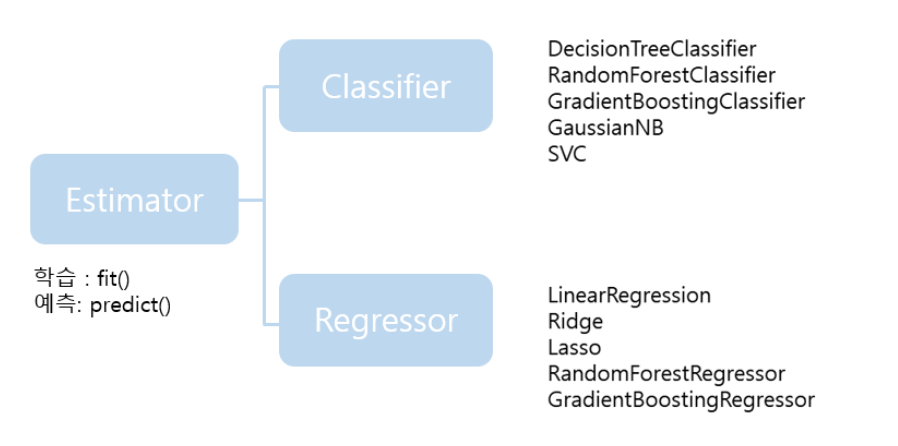

사이킷런에서 비지도 학습인 차원 축소, 클러스터링, 피처 추출등을 구현한 클래스의 대부분은 fit()과 transform()을 적용한다. 비지도학습과 피처 추출에서 fit()은 지도학습에서의 학습과 같은 의미가 아닌 **입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 작업**이라고 말할수 있다.

**사이킷런의 주요 모듈**
다음은 사이킷런의 주요 모듈을 요약한 것이다. 자주 쓰이는 핵심 모듈 위주로 정리한 것이다.

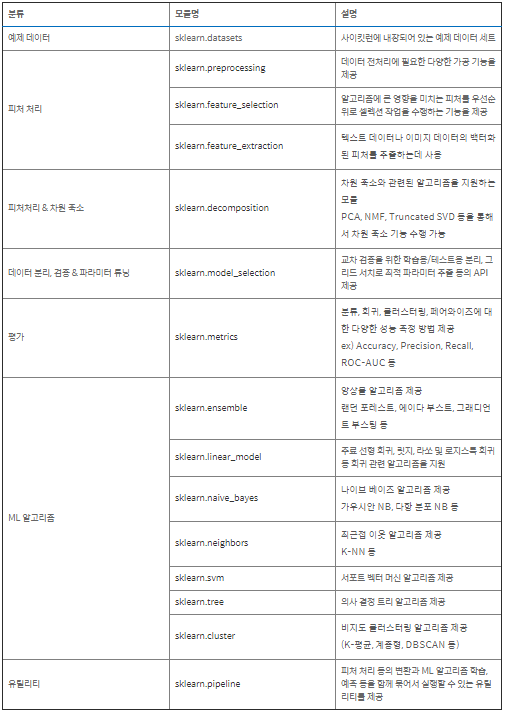

일반적으로 머신러닝 모델을 구축하는 주요 프로세스는 피처의 가공, 변경, 추출을 수행하는 피처 처리(feature processing), ML 알고리즘 학습/예측 수행, 그리고 모델 평가의 단계를 반복적으로 수행하는 것이다. 사이킷런 패키지는 머신러닝 모델을 구축하는 주요 프로세스를 지원하기 위해 매우 편리하고 다양하며 유연한 모듈을 지원한다.


사이킷런에 내장된 데이터 세트는 일반적으로 딕셔너리 형태로 돼 있다.
    # 딕셔너리란 사전형 데이터를 의미하며, key와 value를 1대1로 대응시킨 형태를 말한다.

키는 보통 data, target, target_name, feature_names, DESCR로 구성돼 있다. 개별 키가 가리키는 의미는 다음과 같다.

- data는 피처의 데이터 세트를 가리킨다.
- target은 분류 시 레이블 값, 회귀일 때는 숫자 결괏값 데이터 세트이다.
- target_names는 개별 레이블의 이름을 나타낸다.
- feature_names는 피처의 이름을 나타낸다.
- DESCR은 데이터 세트에 대한 설명과 각 피처의 설명을 나타낸다.

data, target은 넘파이 배열 타입, target_names, feature_names는 넘파이 배열 또는 파이썬 리스트 타입, DESCR은 스트링 타입이다. 피처의 데이터 값을 반환받기 위해서는 내장 데이터 세트 API를 호출한 뒤에 그 key값을 지정하면 된다.

In [40]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


load_iris() API의 반환 결과는 sklearn, utils, bunch 클래스이다. 데이터 세트에 내장돼 있는 대부분의 데이터 세트는 이와 같이 딕셔너리 형태의 값을 반환한다. 딕셔너리 형태이므로 load_iries() 데이터 세트의 Key 값을 확인해 보자.

In [41]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


데이터 키는 피처들의 데이터 값을 가리킨다. 데이터 세트가 딕셔너리 형태이기 때문에 피처 데이터 값을 추출하기 위해서는 데이터 세트.data를 이용하면 된다.<br>
load_iris()가 반환하는 객체의 키인 feature_names, target_names, data, taget이 가르키는 값을 다음 예제 코드에 출력했다. 

In [42]:
print('\n feature_names 의 type:',type(iris_data.feature_names)) 
print(' feature_names 의 shape:',len(iris_data.feature_names)) 
print(iris_data.feature_names) 

print('\n target_names 의 type:',type(iris_data.target_names)) 
print(' feature_names 의 shape:',len(iris_data.target_names)) 
print(iris_data.target_names) 

print('\n data 의 type:',type(iris_data.data)) 
print(' data 의 shape:',iris_data.data.shape) 
print(iris_data['data']) 

print('\n target 의 type:',type(iris_data.target)) 
print(' target 의 shape:',iris_data.target.shape) 
print(iris_data.target)



 feature_names 의 type: <class 'list'>
 feature_names 의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names 의 type: <class 'numpy.ndarray'>
 feature_names 의 shape: 3
['setosa' 'versicolor' 'virginica']

 data 의 type: <class 'numpy.ndarray'>
 data 의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0

## Moder Selection 모듈 소개
### 학습/테스트 데이터 세트 분리 - train_test_split()
먼저 테스트 데이터 세트를 이용하지 않고 학습 데이터 세트로만 학습하고 예측하면 무엇이 문제인지 살펴보자. 다음 예제는 학습과 예측을 동일한 데이터 세트로 수행한 결과이다.

In [43]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris=load_iris()
dt_clf=DecisionTreeClassifier()
train_data=iris.data
train_label=iris.target
dt_clf.fit(train_data,train_label)

# 학습 데이터로 예측 하기
pred=dt_clf.predict(train_data)
print('예측 정확도:',accuracy_score(train_label,pred))

예측 정확도: 1.0


정확도가 100%가 나왔다. 뭔가 이상하죠?? 이러한 결과가 나온 이유는 이미 학습한 데이터를 기반으로 예측을 하였기 때문이다. 따라서 예측을 수행하는 데이터 세트는 학습용 데이터 세트가 아닌 다른 테스트 데이터 세트여야 한다.

사이킷런에서는 train_test_split()를 사용해서 데이터 세트를 쉽게 분리할 수 있다. train_test_split(): 첫 번째 파라미터: 피처 데이터 세트, 두 번째 파라미터: 레이블 데이터 세트 그리고 선택적으로 다음 파라미터를 입력 받는다.

- test_size: 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정한다.(디폴트가 0.25, 25%이다)
- train_size: 전체 데이터에서 학습용 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정한다.
- shuffle: 데이터를 불리하기 전에 데이터를 미리 섞을지를 결정한다. (디폴트는 True입니다) 데이터를 분산시켜서 좀 더 효율적인 학습 및 테스트 데이터 세트를 만들어 준다.
- random_state: 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값이다. 이 파라미터를 지정하지 않으면 수행할 때마다 다른 학습/테스트 용으로 데이터를 생성하게 된다.

붓꽃 데이터를 학습 데이터를 70%, 데스트 데이터를 30%로 분리하는 예제를 해보겠다.

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

df_clf=DecisionTreeClassifier()
iris_data=load_iris()

x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.3, random_state=121)

학습 데이터를 기반으로 DecisionTreeClassifier를 학습하고 이 모델을 예측 정확도를 측정해 보자.

In [45]:
df_clf.fit(x_train,y_train)
pred=df_clf.predict(x_test)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도:0.9556


테스트 데이터로 예측을 수행한 결과 정확도가 약95.56%이다. 붓꽃 데이터는 150개의 데이터로 데이터 양이 크지 않아 전체의 30% 정도인 테스트 데이터는 45개 정도밖에 되지 않으므로 이를 통해 알고리즘의 예측성을 판단하기에는 그리 적절하지 않다. 학습을 위한 데이터의 양을 일정 수준 이상으로 보장하는 것도 중요하지만, 학습된 모델에 대해 다양한 데이터를 기반으로 예측 성능을 평가해보는 것도 매우 중요하다.

### 교차 검증
알고리즘을 학습시키는 학습 데이터와 이에 대한 예측 성능을 평가하기 위한 별도의 테스트용 데이터가 필요하다. 하지만 이 방법 역시 과적합에 취약하다는 약점을 가질 수 있다. 과적합은 모델이 학습 데이터에만 과도하게 최적화 되어서 실제 예측을 다른 데이터로 시도했을 경우 예측 성능이 과도하게 떨어지는 현상을 말한다.이러한 문제를 개선하기 위해서 사용하는 교차검증에 대해서 배워보도록 하겠다.

교차 검증은 쉽게 말하자면 예를들어 시험을 보기 위해서 예비 모의고사를 여러 번 풀어보는 것이라고 생각하면 된다. 교차 검증은 데이터의 편중을 막기 위해서 별도의 여러개의 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것이다. 

대부분의 ML 모델에서 성능 평가는 교차 검증을 기반으로 1차 평가를 한 뒤에 최종적으로는 테스트 데이터세트에 적용해 평가하는 방식으로 진행된다. ML에서 사용되는 데이터 세트를 세분화 하면 학습, 검증, 테스트 3가지로 나눌 수 있다. 검증 데이터 세트는 최종 평가가 이루어지기 전에 학습된 모델을 다양하게 평가하는게 사용이 된다. 

**K 폴드 교차 검증**

K 폴드 교차 검증은 먼저 K개의 데이터 폴드 세트를 만들은 후 K번만큼 각 폴드 세트에 학습과 평가를 반복적으로 수행하는 방법이다.

5폴드 교차 검증을 수행한다. 5개의 폴드된 데이터 세트를 학습과 검증을 위한 데이터 세트로 변경하면서 5번 평가를  수행한 뒤, 5개의 평가를 평균한 결과를 가지고 예측성능 평가를 한다.

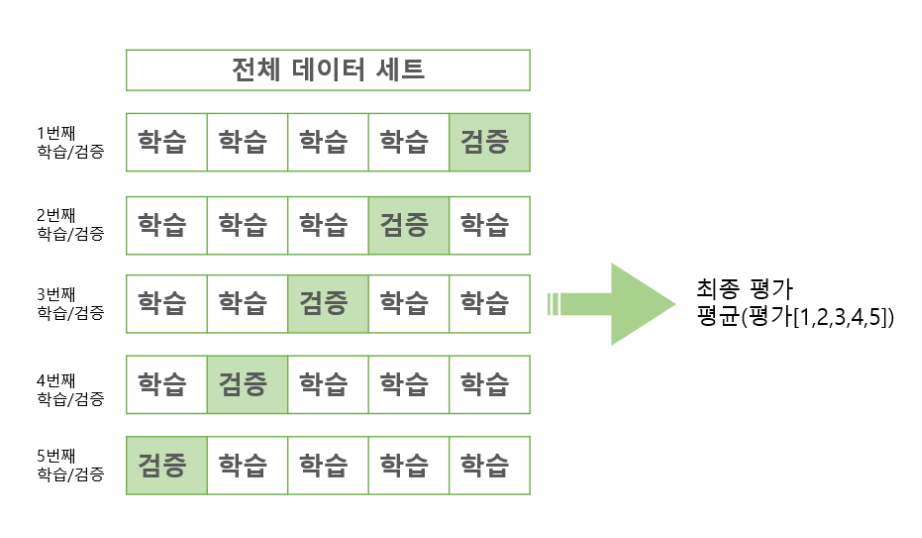

총 5개의 폴드 세트에 5번의 학습과 검증 평가가 반복적으로 수행된다. 학습 데이터와 검증 데이터를 점진적으로 변경하면서 마지막 5번째까지 학습과 검증을 수행하게 되는 것이다. 5개의 예측 평가를 구하게 되면 최종적으로 평균을 취해서 결과가 반영이 된다.

사이킷런에서는 K 폴드 교차 검증 프로세스를 위해서 KFold와 StrarifiedKFold 클래스를 제공한다. 먼저 KFold 클래스를 이용해서 붓꽃 데이터 세트를 교차 검증및 예측 정확도를 알아보도록 하겠다. 

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris=load_iris()
features=iris.data
label=iris.target
dt_clf=DecisionTreeClassifier(random_state=156)

# 5개의 세트르 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성하기
Kfold=KFold(n_splits=5)
cv_accuracy=[]
print('붓꽃 데이터 크기:',features.shape[0])

붓꽃 데이터 크기: 150


KFold로 KFord 객체를 생성했으니 이제 생성된 KFold 개체의 split()을 호출해 전체 붓꽃 데이터를 5개의 폴드 데이터 세트로 분리한다. 전체 데이터 세트는 150개이다. 따라서 학습용 데이터 세트는 120개, 검증 테스트 데이터 세트는 30개로 분할하게 된다. 다음으로는 5개의 폴드 세트를 생성하는 KFold 객체의 split()을 호출하여 교차 검증 수행 마다 학습과 검증을 반복해 예측 정확도를 측정하도록 해보겠다.

In [47]:
n_iter=0

for train_index, test_index in Kfold.split(features):
    x_train, x_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    dt_clf.fit(x_train, y_train)
    pred = dt_clf.predict(x_test)
    n_iter += 1
    
    accuracy = np.round(accuracy_score(y_test,pred),4)
    train_size=x_train.shape[0]
    test_size=x_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기 {3}'.format(n_iter,accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
    print('\n## 평균 검증 정확도:',np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

## 평균 검증 정확도: 1.0

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

## 평균 검증 정확도: 0.98335

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

## 평균 검증 정확도: 0.9444666666666667

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

## 평균 검증 정확도: 0.941675

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


5번 교차 검증 결과 평균 검증 정확도는 0.9이다. 그리고 교차 검증 시마다 검증 세트의 인덱스가 달라짐을 알 수 있다.


**Stratified K 폴드**

Startified K폴드는 불균형한 분포도를 가진 레이블 데이터 집합을 위한 K폴드 방식이다. 불균형한 분포도를 가진 레이블 데이터 집합은 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 것을 말한다.

Startifide K폴드는 K폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결해 준다.

In [48]:
import pandas as pd

iris=load_iris()
iris_df=pd.DataFrame(data=iris_data,columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

iris 원본 데이터는 50:50:50의 비율로 구성되어 있는 것을 확인 하였다. 이슈가 발생하는 현상으 도출하기 위해 3개의 폴드 세트를 KFold로 생성하고, 각 교차 검증 시마다 생성되는 학습/검증 레이블 데이터 값의 분포도를 확인해 보자.

In [49]:
kfold = KFold(n_splits=3)
n_iter = 0

for train_index, test_index in kfold.split(iris_df):
    n_iter+=1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('\n##교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포: \n', label_train.value_counts())
    print('검증 레이블 데이터 분포: \n', label_test.value_counts())


##교차 검증: 1
학습 레이블 데이터 분포: 
 2    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 0    50
Name: label, dtype: int64

##교차 검증: 2
학습 레이블 데이터 분포: 
 2    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 1    50
Name: label, dtype: int64

##교차 검증: 3
학습 레이블 데이터 분포: 
 1    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 2    50
Name: label, dtype: int64


StatifiedKFold는 KFold로 분할 된 레이블 데이터 세트가 전체 레이블 값의 분포도를 반영하지 못하는 문제를 해결해 준다. StatifiedKFold는 레이블 데이터 분포도에 따라 학습/검증 데이터를 나누기 때문에 split() 메서드에 인자로 피처 데이터 세트뿐만 아니라 레이블 데이터 세트도 반드시 필요하다. 포드 세트는 3개로 설정 하자.

In [50]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('\n## 교차검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포: \n', label_train.value_counts())
    print('검증 레이블 데이터 분포: \n', label_test.value_counts())


## 교차검증: 1
학습 레이블 데이터 분포: 
 2    34
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 1    17
0    17
2    16
Name: label, dtype: int64

## 교차검증: 2
학습 레이블 데이터 분포: 
 1    34
2    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 2    17
0    17
1    16
Name: label, dtype: int64

## 교차검증: 3
학습 레이블 데이터 분포: 
 0    34
2    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 2    17
1    17
0    16
Name: label, dtype: int64


출력 결과를 보면 학습 레이블과 검증 레이블 데이터 값의 분포도가 동일하게 할당됐음을 알 수 있다. 첫 번째 교차 검증에서 학습 레이블은 0, 1, 2 값이 각각 33개로, 레이블별로 동일하게 할당됐고 검증 레이블 역시 0, 1, 2 값이 각각 17개로 레이블 별로 동일하게 할당된걸 알 수 있다.

다음은 StratifiedKFold를 이용해 데이터를 분리한 것이다.


In [51]:
dt_clf = DecisionTreeClassifier(random_state=156) 
skfold = StratifiedKFold(n_splits=3) 
n_iter=0 
cv_accuracy=[] 

# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 셋도 추가 입력 필요 
for train_index, test_index in skfold.split(features, label): 
  # split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출 
  X_train, X_test = features[train_index], features[test_index] 
  y_train, y_test = label[train_index], label[test_index] 
  #학습 및 예측 
  dt_clf.fit(X_train , y_train) 
  pred = dt_clf.predict(X_test) 
  
  # 반복 시 마다 정확도 측정 
  n_iter += 1 
  accuracy = np.round(accuracy_score(y_test,pred), 4) 
  train_size = X_train.shape[0] 
  test_size = X_test.shape[0] 
  print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}' .format(n_iter, accuracy, train_size, test_size)) 
  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index)) 
  cv_accuracy.append(accuracy) 

  # 교차 검증별 정확도 및 평균 정확도 계산 
  print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4)) 
  print('## 평균 검증 정확도:', np.mean(cv_accuracy))



#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

## 교차 검증별 정확도: [0.98]
## 평균 검증 정확도: 0.98

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

## 교차 검증별 정확도: [0.98 0.94]
## 평균 검증 정확도: 0.96

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667


3개의 Stratified K 폴드로 교차 검증한 결과 평균 검증 정확도가 약 96.66%로 측정되었다. Stratified K 폴드의 경우 원본 데이터의 레이블 분포도 특성을 반영한 학습 및 검증 데이터 세트를 만들 수 있으므로 왜곡된 레이블 데이터 세트에서는 반드시 Stratified K 폴드를 이용해 교차 검증해야 한다. 사실, 일반적으로 분류(Classification)에서의 교차 검증은 K 폴드가 아니라 Stratified K 폴드로 분할돼야 한다.

**회귀(Regression)에서는 Stratified K 폴드가 지원되지 않는다.** 이유는 간단하다. 회귀의 결정값은 이산값 형태의 레이블이 아니라 연속된 숫자값이기 때문에 결정값별로 분포를 정하는 의미가 없기 때문이다.

**교차 검증을 보다 간편하게 - cross_val_score( )**

사이킷런은 교차 검증을 좀 더 편리하게 수행할 수 있게 해주는 API를 제공한다. 대표적인 것이 cross_val_score( )이다. KFold로 데이터를 학습하고 예측하는 코드를 보면 먼저 ① 폴드 세트를 설정하고 ② for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스를 추출한 뒤 ③ 반복적으로 학습과 예측을 수행하고 예측 성능을 반환한다.

cross_val_score( )는 일련의 과정을 한꺼번에 수행해주는 API 이다. 다음은 cross_val_score( ) API의 선언 형태이다.

    cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
이 중 estimator, X, y, scoring, cv가 주요 파라미터이다

- esmitator :  사이킷런의 분류 알고리즘 클래스인 Classifier 또는 회귀 알고리즘 클래스인 Regressor를 의미
- X : 피처 데이터 세트
- y : 레이블 데이터 세트
- scoring : 예측 성능 평가 지표를 기술
- cv : 교차 검증 폴드 수

cross_val_score( ) 수행 후 반환 값은 scoring 파라미터로 지정된 성능 지표 측정값을 배열 형태로 반환한다. cross_val_score( )는 classifier가 입력되면 Stratified K 폴드 방식으로 레이블값의 분포에 따라 학습/테스트 세트를 분할한다.(회귀인 경우에는 Stratified K 폴드 방식으로 분할할 수 없으므로 K 폴드 방식으로 분할한다.)

다음 코드에서 cross_val_score()의 자세한 사용법을 살펴보자. 교차 검증 폴드 수는 3, 성능평가 지표는 정확도인 accuracy로 하자.

In [52]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score , cross_validate 
from sklearn.datasets import load_iris 

iris_data = load_iris() 
dt_clf = DecisionTreeClassifier(random_state=156) 

data = iris_data.data 
label = iris_data.target 

# 성능 지표는 정확도(accuracy) , 교차 검증 세트 는 3개 
scores = cross_val_score(dt_clf , data , label , scoring='accuracy',cv=3) 
print('교차 검증별 정확도:',np.round(scores, 4)) 
print('평균 검증 정확도:', np.round(np.mean(scores), 4))


교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


cross_val_score( )는 cv로 지정된 횟수만큼 scoring 파라미터로 지정된 평가 지표로 평가 결과값을 배열로 반환한다. 그리고 일반적으로 이를 평균하여 평가 수치로 사용한다. cross_val_score( ) API는 내부에서 Estimator를 학습(fit), 예측(predict), 평가(evaluation)시켜주므로 간단하게 교차 검증을 수행할 수 있다.

cross_val_score( )와 앞 예제의 StratifiedKFold의 수행 결과를 비교해 보면 각 교차 검증별 정확도와 평균 검증 정확도가 모두 동일함을 알 수 있다. 이는 cross_val_score( )가 내부적으로 StratifiedKFold를 이용하기 때문이다.


**GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에**

사이킷런은 GridSearchCV API를 이용해 Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공한다. (Grid는 격자라는 뜻으로, 촘촘하게 파라미터를 입력하면서 테스트를 하는 방식이다.) 예를 들어 결정 트리 알고리즘의 여러 하이퍼 파라미터를 순차적으로 변경하면서 최고 성능을 가지는 파라미터 조합을 찾고자 한다면 다음과 같이 파라미터의 집합을 만들고 이를 순차적으로 적용하면서 최적화를 수행할 수 있다.

    parameters = {'max_depth':[1, 2, 3], 'min_samples_split':[2,3]}

총 6회에 걸쳐 파라미터를 순차적으로 바꿔 실행하면서 최적의 파라미터와 수행 결과를 도출할 수 있다.


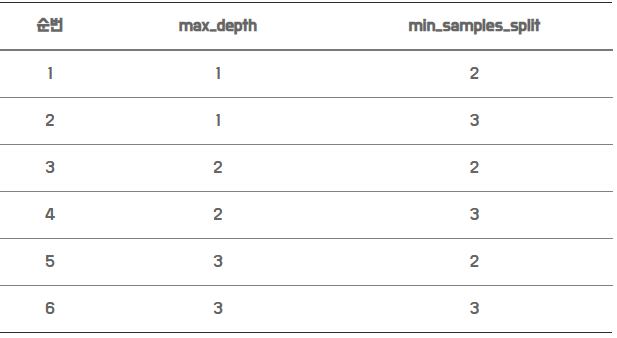

GridSearchCV는 사용자가 튜닝하고자 하는 여러 종류의 하이퍼 파라미터를 다양하게 테스트하면서 최적의 파라미터를 편리하게 찾게 해주지만 동시에 **순차적으로 파라미터를 테스트하므로 수행시간이 상대적으로 오래 걸리는 것에 유념**해야 한다.

위의 경우 순차적으로 6회에 걸쳐 하이퍼 파라미터를 변경하면서 교차 검증 데이터 세트에 수행 성능을 측정한다. CV가 3회라면 개별 파라미터 조합마다 3개의 폴딩 세트를 3회에 걸쳐 학습/평가해 평균값으로 성능을 측정한다. 6개의 파라미터 조합이라면 총 CV 3회 * 6개 파라미터 조합 = 18회의 학습/평가가 이뤄진다.

GridSerchCV클래스의 생성자로 들어가는 주요 파라미터는 다음과 같다.
- estimator : classifier, regressor, pipeline이 사용될 수 있다.
- param_grid : key + 리스트 값을 가지는 딕셔너리가 주어진다. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정한다.
- scoring : 예측 성능을 측정할 평가 방법을 지정한다. 보통은 사이킷런의 성능 평가 지표를 지정하는 문자열(예 : 정확도의 경우 'accuracy')로 지정하나 별도의 성능 평가 지표 함수도 지정할 수 있다.
- cv : 교차 검증을 위해 분할되는 학습 / 테스트 세트의 갯수를 지정한다.
- refit : 디폴트가 True이며 True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 esitmator 객체를 해당 하이퍼 파라미터로 재학습 시킨다.

다음은 결정 트리 알고리즘의 여러 가지 최적화 파라미터를 순차적으로 적용해 붓꽃 데이터를 예측 분석하는 데 GridSearchCV를 이용한다. 테스트할 하이퍼 파라미터 세트는 딕셔너리 형태로 하이퍼 파라미터의 명칭은 문자열 Key 값으로, 하이퍼 파라미터의 값은 리스트 형으로 설정한다.


In [53]:
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV 

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리 
iris = load_iris() 
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=121) 
dtree = DecisionTreeClassifier() 

### parameter 들을 dictionary 형태로 설정 
parameters = {'max_depth':[1, 2, 3], 'min_samples_split':[2,3]}

학습 데이터 세트를 GridSearchCV 객체의 fit(학습 데이터 세트) 메서드에 인자로 입력한다. 

GridSearchCV 객체의 fit(학습 데이터 세트) 메서드를 수행하면 학습 데이터를 cv에 기술된 폴딩 세트로 분할해 param_grid에 기술된 하이퍼 파라미터를 순차적으로 변경하면서 학습/평가를 수행하고 그 결과를 cv_result 속성에 기록한다. cv_result 는 gridsearchcv의 결과 세트로서 딕셔너리 형태로 key값과 리스트 형태의 value값을 가진다. cv_result를 Pandas의 DataFrame으로 변환하면 내용을 좀 더 쉽게 볼 수 있다.


In [54]:
import pandas as pd 

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정. 
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴. 
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True, return_train_score=True) 

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 . 
grid_dtree.fit(X_train, y_train) 

# GridSearchCV 결과를 추출해 DataFrame으로 변경
scores_df = pd.DataFrame(grid_dtree.cv_results_) 
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


위의 결과에서 총 6개의 결과를 볼 수 있으며, 이는 하이퍼 파라미터 max_depth와 min_samples_split을 순차적으로 총 6번 변경하면서 학습 및 평가를 수행했음을 나타낸다. 맨 마지막에서 두 번째 행을 보면 평가한 결과 예측 성능이 1위라는 의미이다. split0_test_score, split1_test_score, split2_test_score는 CV가 3인 경우, 즉 3개의 폴딩 세트에서 각각 테스트한 성능 수치이다. mean_test_score는 이 세 개 성능 수치를 평균화한 것이다.

주요 칼럼별 의미는 다음과 같이 정리할 수 있다.
- params 칼럼에는 수행할 때마다 적용된 개별 하이퍼 파라미터 값을 나타낸다.
- rank_test_score는 하이퍼 파라미터별로 성능이 좋은 score 순위를 나타낸다.
- mean_test_score는 개별 하이퍼 파라미터별로 CV의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값이다.

GridSearchCV 객체의 fit( )을 수행하면 최고 성능을 나타낸 하이퍼 파라미터 값과 그때의 평가 결과 값이 각각 best_params, best_score_속성에 기록된다.

In [55]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_) 
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


GridSearchCV 객체의 생성 파라미터로 refit = True가 디폴트이다. refit = True이면 GridSearchCV가 최적 성능을 나타내는 하이퍼 파라미터로 Estimator를 학습해 best_estimator_로 저장한다.

In [56]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환 
estimator = grid_dtree.best_estimator_ 

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨 
pred = estimator.predict(X_test) 
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.9667


일반적으로 학습 데이터를 GridSearchCV를 이용해 최적 하이퍼 파라미터 튜닝을 수행한 뒤에 별도의 테스트 세트에서 이를 평가하는 것이 일반적인 머신러닝 모델 적용 방법이다.

## 데이터 전처리

데이터 전처리(Data Preprocessing)은 ML 알고리즘만큼 중요하다. ML 알고리즘은 데이터에 기반하고 있기 때문에 어떤 데이터를 입력으로 가지느냐에 따라 결과도 크게 달라질 수 있다.(Garbage In, Garbage Out). 사이킷런의 ML 알고리즘을 적용하기 전에 데이터에 대해 미리 처리해야 할 기본 사항이 있다.

결손값, 즉 NaN, Null 값은 허용되지 않는다. 따라서 이러한 Null 값은 고정된 다른 값으로 변환해야 한다. 피처 값 중 Null 값이 얼마 되지 않는다면 피처의 평균값 등으로 간단히 대체할 수 있다. 하지만 Null 값이 대부분이라면 오히려 해당 피처는 드롭하는 것이 더 좋다. 

사이킷런의 머신러닝 알고리즘은 문자열 값을 입력 값으로 허용하지 않는다. 그래서 **모든 문자열 값은 인코딩돼서 숫자형으로 변환**해야 한다. 문자열 피처는 일반적으로 카테고리형 피처와 텍스트형 피처를 의미한다. 

**데이터 인코딩**

머신러닝을 위한 대표적인 인코딩 방식은 레이블 인코딩(Label encoding)과 원-핫 인코딩(One Hot encoding)이 있다. 레이블 인코딩은 카테고리 피처를 코드형 숫자 값으로 변환한다. 주의해야 할 점은 '01', '02'와 같은 코드 값 역시 문자열이므로 1, 2와 같은 숫자형 값으로 변환돼야 한다.

**레이블 인코딩**

사이킷런의 레이블 인코딩(Label encoding)은 LabelEncoder 클래스를 구현한다. LabelEncoder를 객체로 생성한 후 fit( )과 transform( )을 호출해 레이블 인코딩을 수행한다.

In [57]:
from sklearn.preprocessing import LabelEncoder 

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서'] 

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
encoder = LabelEncoder() 
encoder.fit(items) 
labels = encoder.transform(items) 
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


문자열 값이 어떤 숫자 값으로 인코딩됐는지 직관적으로 알고 싶을 경우에는 LabelEncoder 객체의 classes_ 속성값으로 확인한다.

In [58]:
print('인코딩 클래스:',encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


classes_ 속성은 0번부터 순서대로 변환된 인코딩 값에 대한 원본값을 가지고 있다. inverse_transform( )을 통해 인코딩된 값을 다시 디코딩할 수 있다.

In [59]:
print('디코딩 원본 값:',encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본 값: ['전자렌지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


레이블 인코딩은 간단하게 문자열 값을 숫자형 카테고리 값으로 변환한다. 하지만 레이블 인코딩이 일괄적인 숫자 값으로 변환이 되면서 몇몇 ML 알고리즘에는 이를 적용할 경우 예측 성능이 떨어지는 경우가 발생할 수 있다. 이는 숫자 값의 경우 크고 작음에 대한 특성이 작용하기 때문이다. 즉, 냉장고가 1, 믹서가 2로 변환되면, 1보다 2가 더 큰 값이므로 특정 ML 알고리즘에서 **가중치가 더 부여되거나 더 중요하게 인식할 가능성이 발생**합니다. 하지만 냉장고와 믹서의 숫자 변환 값은 단순 코드이지 숫자 값에 따른 순서나 중요도로 인식돼서는 않된다. 이러한 특성 때문에 레이블 인코딩은 선형 회귀와 같은 ML 알고리즘에는 적용하지 않아야 한다. 트리 계열의 ML 알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 레이블 인코딩도 별 문제가 없다.

    # 원-핫 인코딩(One-Hot Encoding)은 레이블 인코딩의 이러한 문제점을 해결하기 위한 인코딩 방식이다.

**원-핫 인코딩(one-hot incoding)**

원-핫 인코딩은 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 대항하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식이다. 즉, 행 형태로 돼 있는 피처의 고유 값을 열 형태로 차원을 변환한 뒤, 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시한다.

원-핫 인코딩은 사이킷런에서 OneHotEncoder 클래스로 쉽게 변환이 가능하다. 단, LabelEncoder와 다르게 약간 주의할 점이 있다. 첫 번쨰는 OneHotEncoder로 변환하기 전에 모든 문자열 값이 숫자형 값으로 변환돼야 한다는 것이며, 두 번째는 입력 값으로 2차원 데이터가 필요하다는 점이다. 

In [60]:
from sklearn.preprocessing import OneHotEncoder 
import numpy as np 

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서'] 

# 먼저 숫자값으로 변환을 위해 LabelEncoder로 변환합니다. 
encoder = LabelEncoder() 
encoder.fit(items) 
labels = encoder.transform(items) 
# 2차원 데이터로 변환합니다. 
labels = labels.reshape(-1,1) 

# 원-핫 인코딩을 적용합니다. 
oh_encoder = OneHotEncoder() 
oh_encoder.fit(labels) 
oh_labels = oh_encoder.transform(labels) 
print('원-핫 인코딩 데이터') 
print(oh_labels.toarray()) 
print('원-핫 인코딩 데이터 차원') 
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


8개의 레코드와 1개의 칼럼을 가진 원본 데이터가 8개의 레코드와 6개의 칼럼을 가진 데이터로 변환 됐다. TV가 0, 냉장고 1, 믹서 2, 선풍기 3, 전자레인지 4, 컴퓨터 5로 인코딩됐으므로 첫 번째 칼럼이 TV, ..., 마지막 여섯 번째 칼럼이 컴퓨터를 나타낸다. 따라서 원본 데이터의 첫 번째 레코드가 TV이므로 변환된 데이터의 첫 번째 레코드의 첫 번째 칼럼이 1이고, 나머지 칼럼은 모두 0이 된다. 이어 두 번째 레코드가 냉장고 이므로 변환된 데이터의 두 번쩨 레코드의 냉장고에 해당하는 두 번째 칼럼이 1이고, 나머지 칼럼은 모두 0이 된다.
- 원핫인코딩: https://wikidocs.net/22647

판다스에는 원-핫 인코딩을 더 쉽게 지원하는 API가 있다. get_dummies( )를 이용하면 된다. 사이킷런의 OneHotEncoder와 다르게 문자열 카테고리 값을 숫자 형으로 변환할 필요 없이 바로 변환할 수 있다.

In [61]:
import pandas as pd 

df = pd.DataFrame({'item':['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서'] }) 
pd.get_dummies(df)


,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


get_dummies()를 이용하면 숫자형 값으로 변환 없이도 바로 변환이 가능하다.

**피처 스케일링과 정규화**

서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 피처 스케일링이라 한다. 대표적으로 표준화와 정규화가 있다.

표준화는 데이터의 피처 가각이 평균이 0이고 분산이1인 가우시안 정규 분포를 가진 값으로 변환하는 것을 의미한다.

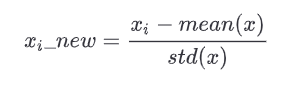

일반적으로 정규화는 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념이다. 예를 들어 피처 A는 거리를 나타내는 변수로서 값이 0 ~ 100KM로 주어지고 피처 B는 금액을 나타내는 속성으로 0 ~ 1,000,000,000원으로 주어진다면 이 변수를 모두 동잏한 크기 단위로 비교하기 위해 값을 모두 최소 0 ~ 최대 1의 값으로 변환하는 것이다. 즉, 개별 데이터의 크기를 모두 똑같은 단위로 변경하는 것이다.

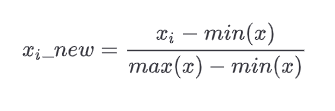

그런데 사이킷런에서 제공하는 Normalizer 모듈은 일반 정규화는 약간의 차이가 있다. 사이킷런에서의 Normalizer 모듈은 선형대수에서의 정규화 개념이 적용됐으며, 개별 벡터의 크기를 맞추기 위해 변환하는 것을 의미한다. 즉, 개별 벡터를 모든 피처 벡터의 크기로 나눠준다. 3개의 피처 x, y, z가 있으면 새로운 데이터는 다음과 같다.

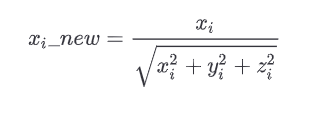

**StandardScaler**

StandardScaler는 표준화를 지원하기 위한 클래스이다. 즉, 개별 피처를 평균이 0이고, 분사이 1인 값으로 변환해준다. 이렇게 가우시안 정규 분포를 가질 수 있도록 데이터를 변환한다. 특히 사이킷런에서 구현한 RBF 커널을 이용하는 SVM(Support Vector Machine), 선형 회귀(Linear Regression), 로지스틱 회귀(Logistic Regression)은 데이터가 가우시안 분포를 가진다는 가정하에 구현됐기에 사전에 표준화를 적용하는 건 성능 향상에 중요한 요소가 될 수 있다.
    # 가우시안분포 = 정규분포

In [62]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환합니다.
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print("/nfeature 들의 분산 값")
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
/nfeature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


다음으로 StandardScaler을 사용해서 표준화를 진행해보자.

In [63]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler=StandardScaler()
# StandardScaler로 데이터 세트 변화, fit()과 transform()호출
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

# transform() 시 스케일 변화된 데이터 세트가 NumPy ndarray로 변환돼 이를 DataFrame으로 변환
iris_df_scaled=pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 평균')
print(iris_df_scaled.mean())
print('\nfeature 분산')
print(iris_df_scaled.var())

feature 평균
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 분산
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


모든 칼럼 값의 평균이 0에 아주 가까운 값으로 그리고 분산은 1에 아주 가까운 값으로 변환됐음을 확인할수 있다.

**MinMaxScaler**

MinMaxScaler는 데이터값을 0과 1사이의 범위 값으로 변환한다.(음수 값이 있으면 -1에서 1값으로 변환한다.) 데이터의 분포가 가우시안 분포가 아닐 경우에 Min, Max Scale을 적용해 볼 수 있다.

In [64]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler=MinMaxScaler()
# MinMaxScaler로 데이터 세트 변환, fit()과 transform()호출
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 NumPy ndarry로 변환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 최솟값')
print(iris_df_scaled.min())
print('/\fearure 최댓값')
print(iris_df_scaled.max())

feature 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
/earure 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


모든 피처에 0에서 1 사이의 값으로 변환되는 스케일링이 적용됐음을 알 수 있다.

**학습 데이터와 테스트 데이터의 스케일링 변환시 유의점**

StandadScaler나 MinMaxScaler 같은 Scaler 객체를 이용해 데이터의 스케일링 변환시 fit(), transform(), fit_transform() 메소드를 이용한다. 그리고 한번에 적용하는 기능을 수행해야 한다.

- fit(): 데이터 변환을 위한 기준 정보설정을 적용
- trancsform(): 설정된 정보를 이용해 데이터를 변환
- fit_transform(): fit(), transform()을 한번에 적용

데이터 전처리 시 fit( ), transform( ) 함수를 사용하는데 이 때 학습용 데이터에는 fit과 transform을 사용하되 테스트 데이터에는 fit을 사용하지 않도록 해야한다. 여기서 fit( )은 데이터 변환을 위한 기준 정보를 설정하며 transform( )은 설정된 정보를 이용해 데이터를 반환한다. 그런데 테스트 데이터에서 다시 fit( )을 사용해버리면 학습 데이터와는 또 다른 새로운 스케일링 기준 정보를 만들게 되어 올바른 예측 결과를 도출하지 못할 수도 있다.

학습 데이터와 테스트 데이터의 fit(), transform(), fit_transform()을 이용해 스케일링 변환 시 유의 할점은 아래와 같다.

- 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
- 1이 여의치 않다면 테스트 데이터 변환시에는 fit()이나 fit_transform() 을 사용하지 않고 학습데이터로 이미 fit( )된 Scaler 객체를 통해 transfrom()으로 변한

## 사이킷런으로 수행하는 타이타닉 생존자 예측

캐글에서 제공하는 타이타닉 탑승자 데이터를 기반으로 생존자 예측을 사이킷런으로 수행행 보겠다.

타이타닉 탑승자 데이터에 대해 개략적으로 살펴보자.

- Passengerid : 탑승자 번호
- survived : 생존 여부 0 : 사망 / 1 : 생존
- pclass : 티켓의 선실 등급
- sex : 성별
- name :이름
- Age : 나이
- sibsp : 같이 탑승한 형제자매 또는 배우자 인원수
- parch : 같이 탑승한 부모님 또는 어린이 인원수
- ticket : 티켓 번호
- fare : 요금
- cabin : 선실 번호
- embarked : 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

탑승자 파일을 판다스의 read_csv()를 이용해 DataFrame으로 로딩하자. 예제를 실행 할때는 맷플롯립과 시본을 이용해 시각화 하자

In [65]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Mounted at /content/drive


In [66]:
from os.path import join

MY_GOOGLE_DRIVE_PATH = 'My Drive/ch1/' # 주소만 수정하면됨
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
print(PROJECT_PATH)

/content/drive/My Drive/ch1/


In [67]:
%cd "{PROJECT_PATH}"

/content/drive/My Drive/ch1


In [68]:
# 모듈 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import numpy as np

# Excel 데이터 데이터프레임으로 변환
titanic_df = pd.read_csv("Titanic_train.csv")


로딩된 데이터 칼럼 타입을 확인해 보겠습니다. DataFrame의 info() 메서드를 통해 쉽게 확인이 가능 합다

In [69]:
print('/n ### 학습 데이터 정보 ### /n')
print(titanic_df.info()) # 데이터를 불러오고 가장 먼저 해야하는 작업

/n ### 학습 데이터 정보 ### /n
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


판다스는 넘파이 기반으로 만들어졌고 넘파이의 String타입이 길이 제한이 있어 이에 대한 구분을 위해 objec 타입으로 명기한다. age, cabin, embarked 칼럼은 각각 714개, 204개, 889개의 not Null 값을 가지고 있고, 각각 177개, 608개, 2개의 Null을 가지고 있다.

사이킷런 머신러닝 알고리즘은 Null 값을 허용하지 않으므로 Null 값을 어떻게 처리할지 결정해야 한다. DataFrame의 fillna() 함수를 사용해 간단하게 Null 값을 평균 또는 고정 값으로 변경한다.

In [ ]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace = True)
titanic_df['Embarked'].fillna('N',inplace = True)
print('데이터 셋 Null 값 개수',titanic_df.isnull().sum().sum())

데이터 셋 Null 값 개수 0


현재 남아있는 문자열 피처는 Sex, Cabin, Embarked 이다. 먼저 피처들의 값 분류를 살펴보자.

In [ ]:
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
B96 B98          4
G6               4
C23 C25 C27      4
D                3
              ... 
C85              1
B3               1
E68              1
A34              1
E40              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


Sex, Embarked 값은 문제 없어 보인다. cabin의 경우 N이 가장 많은 것도 특이하지만 , 속성값이 제대로 정리되지 않은 것 같다. cabin의 경우 선실 번호 중 선실 등급을 나타내는 알파벳이 중요해 보인다. 일등식의 경우 삼등실에 투숙한 사람보다 살아날 확률이 높다. Cabin 속성을의 앞 문자만 추출하자.

In [ ]:
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].head(3)

0    N
1    C
2    N
Name: Cabin, dtype: object

머신러닝 알고리즘을 적용해 예측을 수행하지 전에 데이터를 먼저 탐색해 보겠다. 
어떤 유형의 승객이 생존확률이 높았는지 보자
- 성별이 생존 확률에 어떤 영향을 미쳤는지, 성별에 따른 생존자 수를 비교해 보자.
- 부자와 가난한 사람의 생존확률 , 일등실, 이등실, 삼등실에 따라 생종확률을 살펴보자.
- 나이에 따른 생존확률

In [ ]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Survied 칼럼은 레이블로서 결정 클래스 값이다. Survied 0은 사망, 1은 생존을 의미한다. 남자가 여자에 비해 사망자가 더 많았다. 시각화는 시본 패키지를 이용해 할것이다. 시본은 기본적으로 맷플롯립에 기반하지만, 좀더 새련된 비주얼과 쉬운 API, 판다스의 연동 등으로 데이터 분석을 위한 시각화로 애용 되는 패키지다.

Seaborn 패키지를 이용해 시각화를 진행

- barplot() 을이용
- X축에 'Sex'칼럼
- Y축에 'Survived' 칼럼

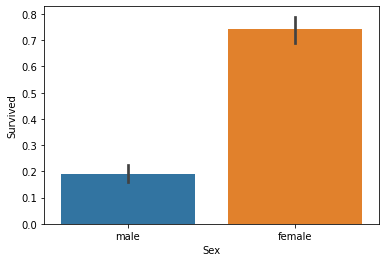

In [ ]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

부자와 가난한 사람 간의 생존 확률은 어떻게 다를지 확인하자. 객실 등급별 생존 확률을 살펴보자

앞에 barplot() 함수에 x 좌표에 ‘Pclass’를 , 그리고 hue파라미터를 추가해 hue=’Sex’와 같이 입력하면 된다.

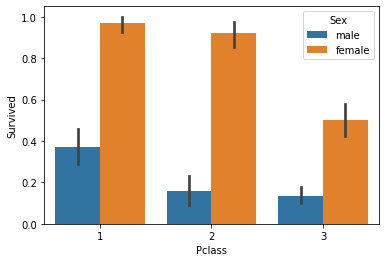

In [ ]:
sns.barplot(x='Pclass',y='Survived',hue = 'Sex',data=titanic_df)

여성의 경우 일, 이등실에 따른 생존 확률의 차이가 크지 않으나 삼등실의 경우 차이가 크다. 남성의 경우 일등실의 생존 확률이 월등히 높다는 것을 볼수 있다. 

이번에는 나이에 따른 생존 확률을 알아보자
- 0~5: baby
- 6~12: child
- 13~18:teenager
- 19~25: student
- 26~35: yuong adult
- 36~60: adult
- 61이상: elderly
- -1이하 오류값: unknown

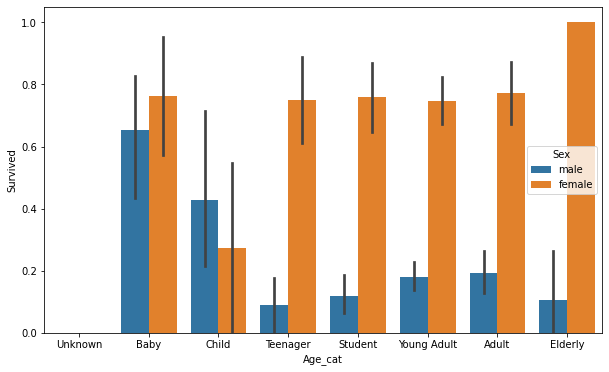

In [ ]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'

    return cat

#막대 그래프의 크기 figure를 설정
plt.figure(figsize=(10,6))

#x축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

#lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정.
#get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] =titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived',hue ='Sex', data=titanic_df,order=group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)

아기의 경우 생존이 비교적 높고, 아이의 경우 생존률이 낮은 것을 확인했다. 분석결과를 기초로 Sex, Age, PClass 등이 생존을 좌우하는 것을 확힌할수 있었다.

남아 있

In [ ]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


지금까지 피처를 가공한 내역을 정리하고 이를 함수로 만들어 쉽게 재사용할 수 있도록 만들겠다. 데이터의 전처리를 전체적으로 호출하는 함수는 transform_features() 이며 Null 처리, 포매팅, 인코딩을 수행하는 내부 함수로 구성했다.

In [ ]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace = True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0,inplace = True)
    return df

#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'],axis=1,inplace=True)
    return df

#레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df= format_features(df)
    return df

원본데이터를 가공하기 위해 원본 csv 파일을 다시 로딩

- Survived 속성만 별도 분리해 클래스 결정값 데이터 세트로 만들기
- Survived 속성을 드롭해 피처 데이터 세트 만들기
- 생성된 데이터 세트에 transform_features()를 적용해 데이터 가공

In [ ]:
#원본 데이터 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출.
titanic_df = pd.read_csv("Titanic_train.csv")
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

train_test_split() API를 이용해 별도의 테스트 데이터 세트 추출, 세트 크기는 전체의 20% 설정

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

ML 알고리즘 결정 트리, 랜덤 포레스트, 로지스틱 회귀를 이용해 타이타닉 생존자를 예측해 보자

- 결정 트리를 위해 DecisionTreeClassifie 클래스 제공
- 랜덤 포레스트를 위해 RandomForestClassifier 클래스 제공
- 로지스틱 회귀를 위해 LogisticRegression 클래스 제공

위의 사이킷런 클래스를 이용해 train_test_split()으로 분리한 데이터와 테스트 데이터를 기반으로 머신러닝 모델을 학습(fit)하고 예측(predict) 한다. 예측 성능 평가는 정확도로 하기위해 accuracy_score() API를 사용한다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

#RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8492


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


최적화 작업을 수행하지 않았고, 데이터 양도 충분하지 않기 때문에 어떤 알고리즘이 가장 성능이 좋은지 평가할 수는 없다. 교차 검증을 위해 KFord 클래스(폴드 개수는 5개로 설정), cross_val_score, GridSearchCV클래스 모두 사용 한다.

In [ ]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []

    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     

    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5) 

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


평균 정확도는 약 78.23% 이다. 교차 검증을 cross_val_score() API를 이용해 수행한다.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df , y_titanic_df , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


방금 전의 K폴드의 평균 정확도가 약간 다른 이유는 cross_val_score가 stratifiedKFord를 이용해 폴드 세트를 분할하기 때문이다.

GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능을 측정해 본다.



In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


하이퍼 파라미터인 max_depth=3, min_samples_leaf=1, min_samples_split=2로 DecisionTreeClassifier를 학습시킨 뒤 예측 정확도가 약 87.15%로 향상됐다. 테스트용 데이터 세트가 작기 때문에 수치상으로 예측 성능이 많이 증가 한것처럼 보인다.

## 정리

**사이킷런**

- 많은 머신러닝 알고리즘을 제공
- 쉽고 직관적인 API 프레임워크
- 편리하고 다양한 모듈 지원

**머신러닝 애플리케이션**

- 데이터의 가공 및 변환 과정의 처리
- 데이터를 학습 대이타와 테스트 데이터로 분리하는 데이터 시트 분리 작업
- 학습 데이터를 기반으로 머신러닝 알고리즘을 적용해 모델을 학습
- 학습된 모델을 기반으로 테스트 데이터에 대한 예측을 수행
- 예측된 결과값을 실제 결과값과 비교해 머신러닝 모델에 대한 평가를 수행

**데이터 전처리 작업**

- 오류 데이터의 보정이나 결손(Null) 처리 등의 다양한 데이터 클렌징 작업
- 레이블 인코딩이나 원-핫 인코딩 같은 이코딩 작업
- 데이터의 스케일링/정규화 작업 등으로 머신러닝 알고리즘이 최적으로 수행될 수 있데 데이터를 사전에 처리

머신러닝 모델은 학습 데이터 세트로 학습한 뒤 반드시 별도의 테스트 데이터 세트로 평가해야 한다. 또한 테스트 데이터의 건수 부족이나 고정된 테스트 데이터 세트를 이용한 반복적인 모델의 학습과 평가는 해당 테스트 데이터 세트에만 치우치는 빈약한 머신러닝 모델을 만들 가능성이 높다.

이를 해결하기 위해 학습 데이터 세트를 학습 데이터와 검증 데이터로 구성된 여러 개의 폴드 세트로 분리해 교차검증을 수행한다.사이킷런은 교차 검증을 지원하기 위해 KFord, StratifiedKFold, cross_val_score 등의 다양한 클레스 함수를 제공한다. 또한 머신러닝 모델의 최적의 하이퍼 파라미터를 교차 검증을 통해 추출하기 위해 GridSearchCV를 제공한다.